# Introduction

The German real estate market, renowned for its stability and resilience, has recently experienced an unprecedented event – the largest quarterly drop in housing prices in 16 years, specifically in the fourth quarter of 2022. Homeownership, a fundamental aspect of individual's lives, is intricately linked to economic factors, policy changes, and global events. This data science project endeavors to unravel the intricate web of influences contributing to this significant downturn.

In the pursuit of understanding the dynamics behind the housing price decline, we will delve into various key factors shaping the real estate landscape. The project will analyze data related to the Consumer Price Index (inflation), changes in interest rates, the impact of the energy crisis, and other relevant economic indicators. By scrutinizing these variables, we aim to pinpoint the catalysts that led to this remarkable shift in the German housing market.

As we navigate through the intricate world of data, our primary question emerges: Why and what factors have precipitated the most substantial quarterly drop in German housing prices in over a decade? This investigation promises not only to shed light on the immediate causes but also to provide insights that may shape future policies and strategies in the ever-evolving real estate sector.

# Methods

Major chunk of data used in this project is quantitative but some datasets like Energy Sources Distribution Dataset is having both qulitative and quantitative data in nature. Following are the 4 type of data sources and their usage in this analysis:

### 1. Housing Data:

- **Source**: The dataset includes information on house price indices for different quarters and years.

- **Usage**: The dataset is useful for analyzing trends in housing prices over time and identifying patterns in different types of residential properties (e.g., new vs. existing). It can be used for real estate market analysis and forecasting.

### 2. Property Data:

- **Source**: This dataset contains information on various property types (flats, single-family houses) across different regions, categorized by metropolitan areas, cities not attached to a district, urban districts, densely populated rural districts, and sparsely populated rural districts.

- **Usage**: Useful for analyzing trends in property indices for different types of regions and property categories. It provides insights into how property values vary across different geographic and property type categories.

### 3. Energy Sources Distribution Data:

- **Source**: The dataset provides information on the distribution of energy sources over the years, including renewable energy, wind, lignite, natural gas, etc.

- **Usage**: Useful for understanding the changing landscape of energy sources over time. It can be used for analyzing the shift towards renewable energy and the contribution of different sources to the overall energy mix.

### 4. Quarterly Economic Indices Data:

- **Source**: The dataset includes economic indices (overall and excluding energy) on a monthly basis.

- **Usage**: Valuable for economic analysis, especially in understanding overall economic trends and the impact of energy prices. It can be used to identify correlations between economic indices and energy-related factors.

## Pipeline Processes:

- ### Data Extraction and Transformation:

   In the script, a class named DataExtractor is employed for the tasks of downloading, transforming, and cleaning up data. The download method acquires a CSV file from a given URL, skips lines with errors, and stores it in a specified output folder. The transform method, on the other hand, handles CSV files differently based on their file paths.

   For example remove metadata, drop the first row and performs column renaming. fills NaN values with zeros. The modified DataFrame is then saved back to the same file. Lastly, the cleanup method efficiently removes all files within the designated data extractor instance folder and deletes the folder itself.

- ### Data Loading and Visualization:

   The script download each file and storing their file paths in data_files_path. After each file is downloaded, transformations are applied using the helper.transform(file_path) method.

   Subsequently, the script attempts to load and visually represent specific data files using various visualization libraries such as Plotly Express, Seaborn, and Matplotlib. For instance, a heatmap is generated for the correlation matrix of a DataFrame associated with Consumer Price Index (CPI) 12 factors. Line plots and bar charts are created to depict trends and distributions in the overall consumer price index and its components over time.

   Additionally, data related to the percentage distribution of energy sources over the years is loaded and visualized. This includes a line plot illustrating changes in distribution.

- ### Error Handling:

   To enhance robustness, the script incorporates error handling by catching **FileNotFoundError** exceptions during the loading and visualization processes. If a file is not found, an informative error message is printed.

- ### Cleanup:

   In the final step, the script ensures cleanup by removing all files within the data extractor instance folder and subsequently deleting the folder itself.

## Issues, Obstacles and Key Points in Data Engineering Process:

* All the data used in this project are directly dowloaded from **Statistisches Bundesamt**. Due to some restrictions, not all the data in their data warehouse is easily accessable. The system requires us to create an account and only with the verified account you can download this data. Due to this problem we can not crawl or use any authentication method in our code to download these data sets.

* As we are trying to answer a question from past so we do not required any data after Q4 2022. So even if we download the data from **Statistisches Bundesamt** we can still perform our Exploratory Data Analysis (EDA) without any issue.

* As the data was collected, cleaned, tranformed by **Statistisches Bundesamt** beforehand, so i invest paltry time to prepare this data. I discarded the metadata and also rename the columns for better data analysis.

* In the tranformation phase I drop the null values, changed the data types and reshape a DataFrame from wide format to long format. The primary purpose was to make the DataFrame more suitable for analysis and visualization by reorganizing the data structure.

* This analysis is using 9 CSVs out of 12 CSVs that were downloaded and tranformed in the start of this project. After looking at the scope of this project, later it was decided to only use 9 CSVs but the oppurtunities are limitless and Based on these sources, we can perform various analyses, such as:
    * **Real Estate Market Analysis:** Explore trends and patterns in housing and property data to identify areas with increasing property values.
    * **Energy Transition Analysis:** Analyze the shift in energy sources over time to understand the progress of the transition to renewable energy.
    * **Economic Impact Analysis:** Examine the relationship between economic indices and energy prices to identify potential economic impacts.


# Results

Following are the data sources that we are using to understand the picture in bigger perspective.

### Consumer Price Index 12-factors Analysis

![Alt text](cpi-12-factors-monthly-levels.svg)

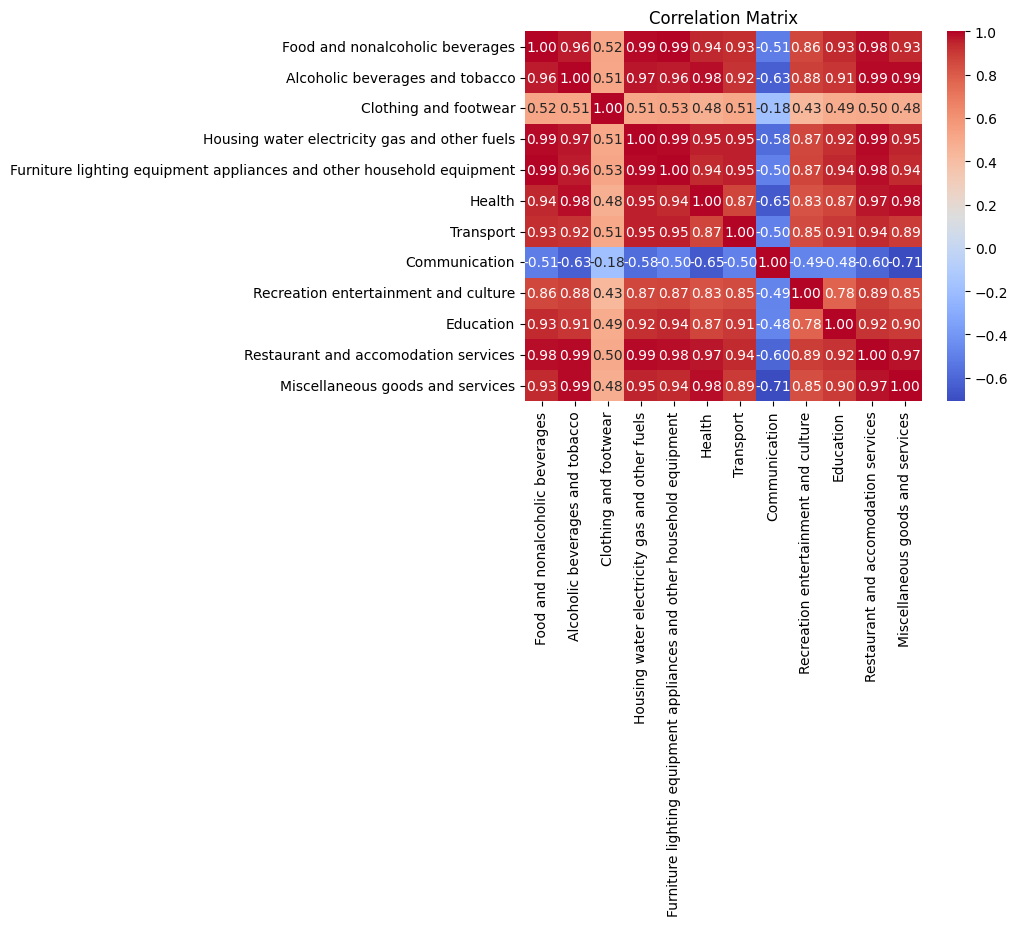

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from pipeline import DataExtractor
from constants import urls

data_files_path = []
helper = DataExtractor()

for url in urls:
    data_files_path.append(helper.download(url))

for file_path in data_files_path:
        helper.transform(file_path)

df = pd.read_csv(data_files_path[1])

# Example: Heatmap for correlation matrix 
columns_to_exclude = ['year', 'month', 'Consumer price index overall']
correlation_matrix = df.drop(columns=columns_to_exclude).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix")
plt.show()

<iframe title="Consumer Price Index 12-factors-change_on_prev_years (Base Year=2020)" aria-label="Interactive line chart" id="datawrapper-chart-D50KM" src="https://datawrapper.dwcdn.net/D50KM/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="600" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"]){var e=document.querySelectorAll("iframe");for(var t in a.data["datawrapper-height"])for(var r=0;r<e.length;r++)if(e[r].contentWindow===a.source){var i=a.data["datawrapper-height"][t]+"px";e[r].style.height=i}}}))}();
</script>

<iframe title="Avg Inflation Rate and European Central Bank (ECB) Interest Rate In Germany from Jan 18 to Aug 23" aria-label="Interactive area chart" id="datawrapper-chart-TWxe2" src="https://datawrapper.dwcdn.net/TWxe2/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="600" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"]){var e=document.querySelectorAll("iframe");for(var t in a.data["datawrapper-height"])for(var r=0;r<e.length;r++)if(e[r].contentWindow===a.source){var i=a.data["datawrapper-height"][t]+"px";e[r].style.height=i}}}))}();
</script>

## Exploratory Data Analysis on Energy Data 

In [2]:
cpi_sp_energy_data_df = pd.read_csv(data_files_path[6])

# Line plot for overall consumer price index over time
fig = px.line(cpi_sp_energy_data_df, x="year", y="overall_index_excluding_energy", title="Overall Consumer Price Index Over Time")
fig.show()

# Bar chart for distribution of components
fig = px.bar(cpi_sp_energy_data_df, x="year", y=["energy_household_and_fuels", "energy_household_electricity_gas_and_other_fuels", "heating_oil_and_fuels"],
            title="Distribution of Components Over Years")
fig.show()


In [3]:
cpi_sp_energy_data_annual_avg_df = pd.read_csv(data_files_path[7])

# Bar chart for overall consumer price index for each year
fig = px.bar(cpi_sp_energy_data_annual_avg_df, x="year", y="overall_index_excluding_energy", title="Yearly Overview of Consumer Price Index")
fig.show()


In [4]:
cpi_sp_energy_dist_data_df = pd.read_csv(data_files_path[8])

# Convert percentage values to numeric
for col in cpi_sp_energy_dist_data_df.columns[1:-1]:
    cpi_sp_energy_dist_data_df[col] = pd.to_numeric(cpi_sp_energy_dist_data_df[col].str.replace(',', '.'), errors='coerce')

# Melt the dataframe for better plotting
melted_df = pd.melt(cpi_sp_energy_dist_data_df, id_vars=["distribution_of_energy_sources", "value_in_percentage"],
                    var_name="year", value_name="percentage")

# Line plot for changes in the percentage distribution of each energy source over the years
fig = px.line(melted_df, x="year", y="percentage", color="distribution_of_energy_sources",
              title="Changes in Percentage Distribution of Energy Sources Over Years",
              labels={"percentage": "Percentage Distribution", "year": "Year"})
fig.show()


In [5]:
# Merge data from cpi_sp_energy_data_df and cpi_sp_energy_data_annual_avg_df
merged_df = pd.merge(cpi_sp_energy_data_df, cpi_sp_energy_data_annual_avg_df, on="year")

# Scatter plot for correlation analysis
fig = px.scatter(merged_df, x="overall_index_excluding_energy_x", y="overall_index_excluding_energy_y",
                trendline="ols", labels={"overall_index_excluding_energy_x": "Energy Data",
                                        "overall_index_excluding_energy_y": "Energy Data Annual Avg"},
                title="Correlation Analysis on Q4 2022")
fig.show()

## Exploratory Data Analysis on Housing Dataset

In [6]:
housing_prices_6_quarters_df = pd.read_csv(data_files_path[9])

# Melt the DataFrame for better plotting
melted_df = pd.melt(housing_prices_6_quarters_df, id_vars='title', var_name='quarter', value_name='index_value')

# Line plot to visualize trends over time
fig = px.line(melted_df, x='quarter', y='index_value', color='title',
              title='Housing Data - Quarterly Trends',
              labels={'index_value': 'Index Value', 'quarter': 'Quarter'})
fig.show()

## Exploratory Data Analysis on Property Price

<iframe title="Property-price-indices-district-types" aria-label="Interactive line chart" id="datawrapper-chart-csUAg" src="https://datawrapper.dwcdn.net/csUAg/2/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="600" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(a){if(void 0!==a.data["datawrapper-height"]){var e=document.querySelectorAll("iframe");for(var t in a.data["datawrapper-height"])for(var r=0;r<e.length;r++)if(e[r].contentWindow===a.source){var i=a.data["datawrapper-height"][t]+"px";e[r].style.height=i}}}))}();
</script>

In [7]:
helper.cleanup()

True

# Conclusion

Our analysis describe us that the reasons cited for the surprising turnaround were rising inflation as well as the hike in interest rates undertaken by banks to combat it. Due to the inflation cunsumers were spending more than what they are earning. The subsidies given by the German Govenment in the time of COVID-19 (from 2019 to 2021) and Russo-Ukrainian War (Feb 2022) was a short term solution to control price hikes and supporting its citizens but after the end of pendamic the subsidies on utilities, energy and groceries etc were bring to a halt, which caused an uncertanity for the comman person.  With all these key points conbined we are now able to understand why the real state industry also face faced the worst time in the past 2 decades. As consumers have less money to spend, the investors/agencies/or an individual owner lower the prices of their property (as their personal savings were also decreasing) so they can survive in the crucial times.

Following are the 2 blog post which also point out the same issue of Deuchland Housing Crises 

1. [German housing prices drop in Q4 2022, signaling end to boom](https://www.dw.com/en/german-housing-prices-drop-in-q4-2022-signaling-end-to-boom/a-65108677)
2. [Germany sees property prices drop in 14 major cities](https://www.thelocal.de/20230824/germany-sees-property-prices-drop-in-14-major-cities)

- ### Limitations and Future Work

    * This analysis maninly focus on the date till Q4 2022 but in the data analysis we also have seen that the drop continues in year 2023, So we can extend our analysis to next years.
    * We can also consider other analysis using the same data such as:
        * **Real Estate Market Analysis:** Explore trends and patterns in housing and property data to identify areas with increasing property values.
        * **Energy Transition Analysis:** Analyze the shift in energy sources over time to understand the progress of the transition to renewable energy.
        * **Economic Impact Analysis:** Examine the relationship between economic indices and energy prices to identify potential economic impacts.